In [18]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import requests
import pandas as pd

from pandas import Series, DataFrame

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [19]:
### REQUEST: gets items according to search for 'query' 

#query = "kit painel solar"
query = input('Qual a query desejada? ')
url = "https://api.mercadolibre.com/sites/MLB/search?q="+query
data = requests.get(url).json()

results = data["results"] # saves content from json in variable
df = DataFrame(results) # converts to a pandas df
df = df[["id", "title", "price", "sold_quantity", "available_quantity"]] # gets only main columns

# sorts items by sold quantity and deletes duplicates with less sales (assuming they'd be 0)
df = df.sort_values(by="sold_quantity", ascending=False)
df = df.drop_duplicates(subset=['title'], keep='first')

ids = df.id.values[0:10] # gets top 10 sold items ML ids in a list

Qual a query desejada? kit painel solar


In [45]:
#### REQUEST: get visits (by days) for the items in 'ids'

days = 365 # number of days ago to consider
ids_string = ','.join(ids) # makes comma-separated string from list to use in URL

url = 'https://api.mercadolibre.com/items/visits/time_window?ids=' + ids_string +'&last=' + str(days) + '&unit=day'
data = requests.get(url).json()

df = DataFrame(data[0]['results']) # initialize a df with the first item out of 10 (top ten in ids_string)
df = df[['date', 'total']] # gets only main columns
df.columns = ['date', data[0]['item_id']] # renames 'total' to item's ID

column_headers = []
column_headers.append(data[0]['item_id'])

# iterates over data items to merge all 'total' columns into same df
for item in data[1:]:
    results = item['results']
    df_temp = DataFrame(results)
    df_temp = df_temp[['date', 'total']]
    df_temp.columns = ['date', item['item_id']]
    column_headers.append(item['item_id'])
    df = pd.merge(df, df_temp, on='date')
    
print(column_headers)
df.head()

['MLB712968328', 'MLB684532632', 'MLB695065272', 'MLB754575430', 'MLB727650542', 'MLB765601179', 'MLB773028235', 'MLB699427412', 'MLB702240163', 'MLB760365541']


,date,MLB712968328,MLB684532632,MLB695065272,MLB754575430,MLB727650542,MLB765601179,MLB773028235,MLB699427412,MLB702240163,MLB760365541
0,2015-09-26T04:00:00Z,141,21,75,0,0,0,0,67,44,0
1,2015-09-27T04:00:00Z,171,14,52,0,0,0,0,88,58,0
2,2015-09-28T04:00:00Z,201,24,93,0,0,0,0,109,55,0
3,2015-09-29T04:00:00Z,137,22,53,0,0,0,0,56,55,0
4,2015-09-30T04:00:00Z,149,24,49,0,0,0,0,67,62,0


In [46]:
# fixes df, setting parsing 'date' properly and setting as index column
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

df.head()

,MLB712968328,MLB684532632,MLB695065272,MLB754575430,MLB727650542,MLB765601179,MLB773028235,MLB699427412,MLB702240163,MLB760365541
date,,,,,,,,,,
2015-09-26 04:00:00,141,21,75,0,0,0,0,67,44,0
2015-09-27 04:00:00,171,14,52,0,0,0,0,88,58,0
2015-09-28 04:00:00,201,24,93,0,0,0,0,109,55,0
2015-09-29 04:00:00,137,22,53,0,0,0,0,56,55,0
2015-09-30 04:00:00,149,24,49,0,0,0,0,67,62,0


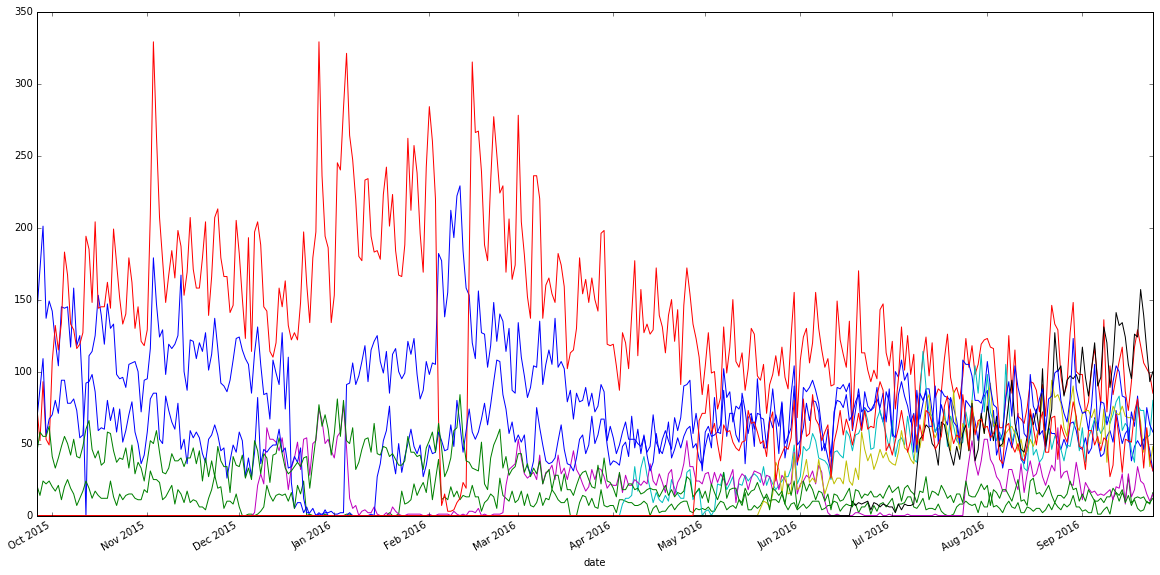

In [47]:
#df = df.cumsum() # calculates accumulated values to plot
#plt.figure()
plt.figure()
df.plot(legend=False);

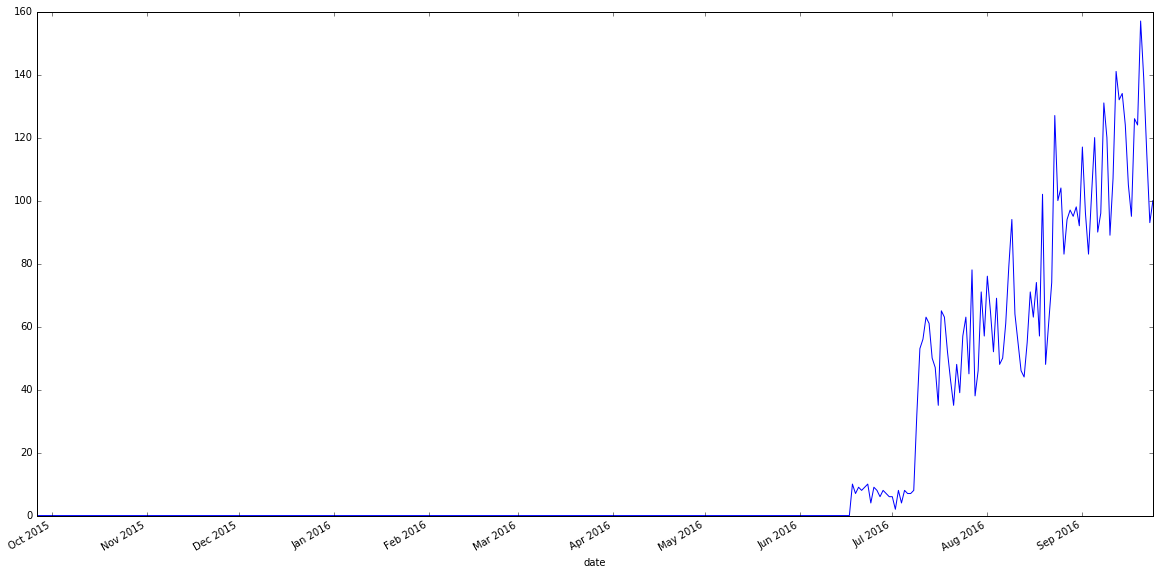

In [48]:
plt.figure();
df['MLB773028235'].plot();